<a href="https://colab.research.google.com/github/TuncerCemUgurluer/SRGAN_CT/blob/main/SRGAN_ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE PROCESSING PROJECT  SRGAN
# TUNCER CEM UĞURLUER

In [ ]:
!nvidia-smi

Sun May 21 12:33:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    14W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Super-Resolution Generative Adverserial Network (SRGAN)

**It is an advanced deep learning technique used enhance the resolution and quality of images.**


**The main goal of SRGAN is to generate high-resolution images from low-resolution inputs. For example, let's say you have a blurry, noisy or pixelated image, and you want to make it sharper and more detailed.**

**SRGAN consist of two main components as other GAN's. A generator and discriminator network. The generator network takes the low-resolution image as tries to generate a high-resolution version of it. The discriminator network, on the other hand, acts as a detective and tries to distinguish between the generated high-resolution images and real high-resolution images.**


# SRGAN ARCHITECTURE



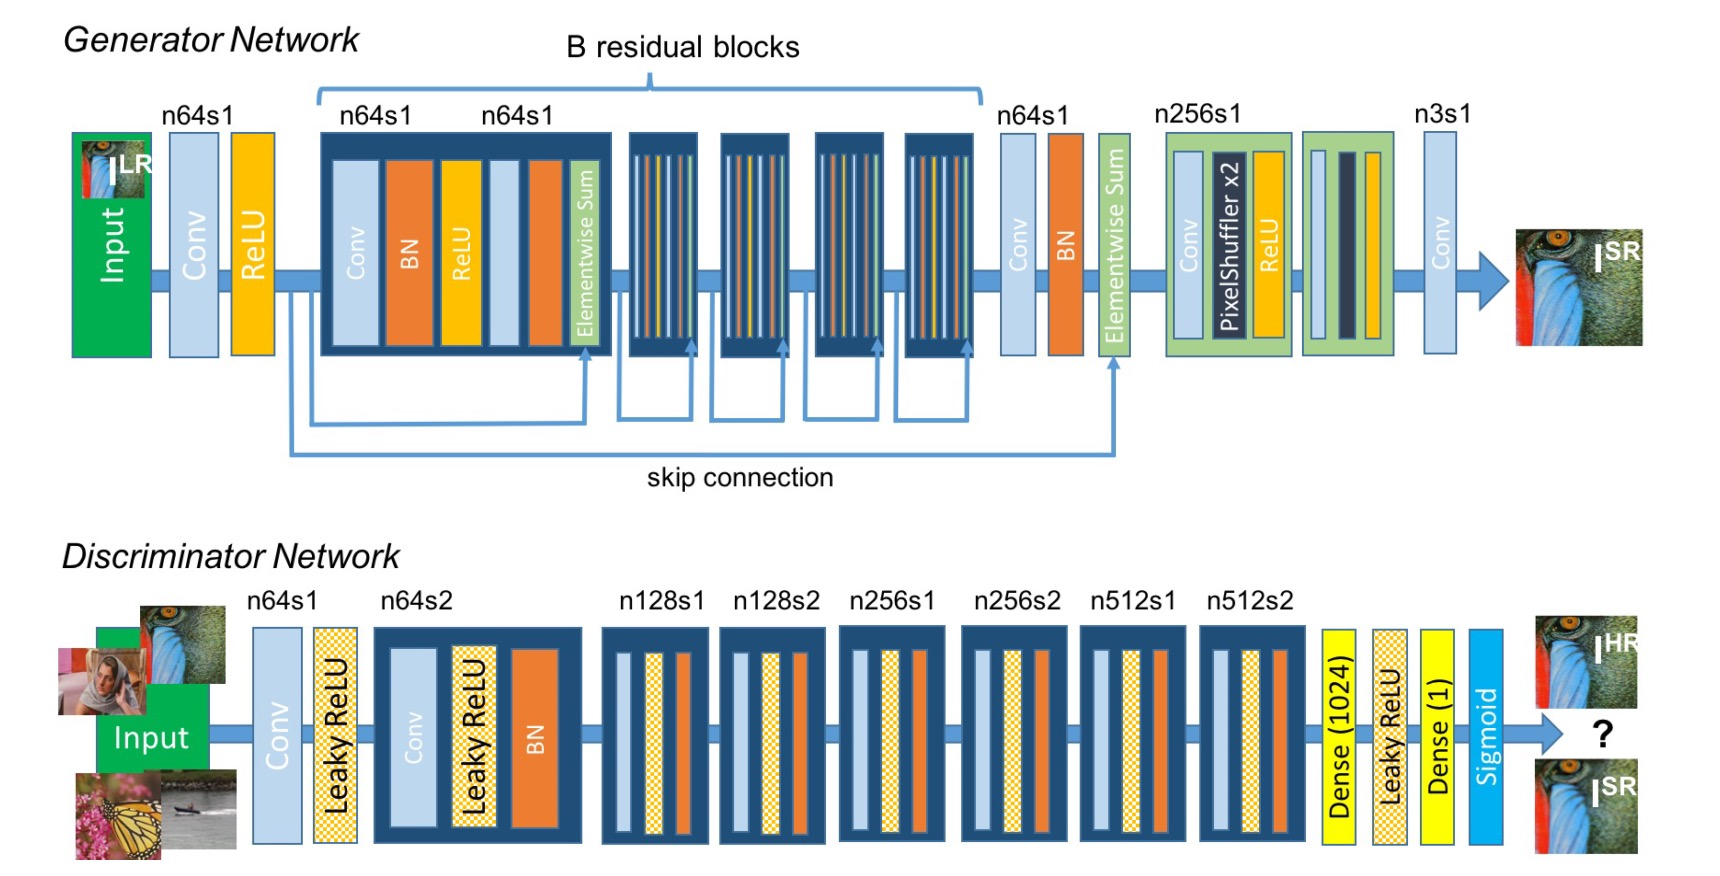

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cemugurluer","key":"15e554976fa41a7274e8bcf1b35033b9"}'}

In [ ]:
!pip install opendatasets
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images"
od.download(dataset_url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 119M/119M [00:06<00:00, 19.0MB/s]


Importing necessary libraries

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers, Model

In [ ]:
import os
import shutil




In [ ]:
os.listdir("/content/chest-ctscan-images/Data/train")

['squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
 'normal',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']

# Building The Dataset
**The dataset I used for training the gan is from Kaggle.com. The dataset consist of 913 grayscale CT images in png format.**


In [ ]:

from PIL import Image

data_folder_path = "/content/chest-ctscan-images/Data"
output_folder_path = "/content/HR_images_train"


if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

train_folder_path = os.path.join(data_folder_path, "train")
subfolders = os.listdir(train_folder_path)


for subfolder in subfolders:
    subfolder_path = os.path.join(train_folder_path, subfolder)


    files = os.listdir(subfolder_path)


    for file in files:
        file_path = os.path.join(subfolder_path, file)


        image = Image.open(file_path)


        image_gray = image.convert("RGB")


        image_resized = image_gray.resize((100, 100))


        output_path = os.path.join(output_folder_path, f"{subfolder}_{file}")
        image_resized.save(output_path)



# Like other deep learning concepts, GAN also needs train and test data.

# Preparing the HR and LR dataset.



*   To build HR dataset I fixed the resolution of the images to (100,100,3), I converted grayscale images to RGB because pre-trained model VGG-19 accepts inputs as (batch_size,w,h,3).
*   To build LR dataset I resized high resolution images to 25x25 also add random noise to images by  noise = np.random.normal(0, 1, image.shape) * 50  # Adjust noise intensity as desired
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)



In [ ]:

from PIL import Image

data_folder_path = "/content/chest-ctscan-images/Data"
output_folder_path = "/content/HR_images_test"


if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

train_folder_path = os.path.join(data_folder_path, "test")
subfolders = os.listdir(train_folder_path)


for subfolder in subfolders:
    subfolder_path = os.path.join(train_folder_path, subfolder)


    files = os.listdir(subfolder_path)


    for file in files:
        file_path = os.path.join(subfolder_path, file)


        image = Image.open(file_path)


        image_gray = image.convert("RGB")


        image_resized = image_gray.resize((100, 100))


        output_path = os.path.join(output_folder_path, f"{subfolder}_{file}")
        image_resized.save(output_path)



In [ ]:


input_folder_path = "/content/HR_images_train"
output_folder_path = "/content/LR_images_train"


if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)


files = os.listdir(input_folder_path)


for file in files:
    file_path = os.path.join(input_folder_path, file)


    image = cv2.imread(file_path, cv2.IMREAD_ANYCOLOR)

    # Add random noise to the image
    noise = np.random.normal(0, 1, image.shape) * 50
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)


    resized_image = cv2.resize(noisy_image, (25, 25))


    output_path = os.path.join(output_folder_path, file)
    cv2.imwrite(output_path, resized_image)


In [ ]:


input_folder_path = "/content/HR_images_test"
output_folder_path = "/content/LR_images_test"


if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)


files = os.listdir(input_folder_path)


for file in files:
    file_path = os.path.join(input_folder_path, file)


    image = cv2.imread(file_path, cv2.IMREAD_COLOR)


    noise = np.random.normal(0, 1, image.shape) * 50
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)


    resized_image = cv2.resize(noisy_image, (25, 25))


    output_path = os.path.join(output_folder_path, file)
    cv2.imwrite(output_path, resized_image)


# Ploting The High-Resolution Image.

(100, 100, 3)


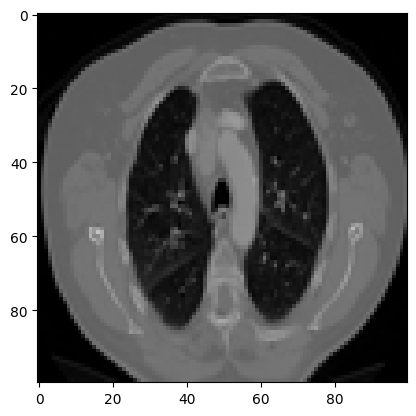

In [ ]:
a=plt.imread("/content/HR_images_train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib_000000 (6).png")
plt.imshow(a,cmap="gray")
print(a.shape)

# Ploting The Low-Resolution and Noisy Corresponding Image

We can see the difference,the low resolution and noisy image is nearly imposible to understand

(25, 25, 3)


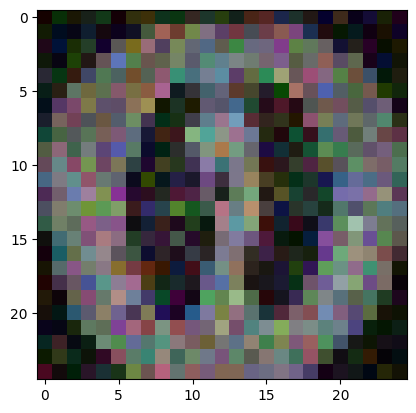

In [ ]:
b=plt.imread("/content/LR_images_train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib_000000 (6).png")
plt.imshow(b,cmap="gray")
print(b.shape)

In [ ]:
os.listdir("/content/HR_images_train")

['squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa_000030 (5).png',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib_000092 (10).png',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib_000050 (3).png',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa_sq5.png',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa_000072 (2).png',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa_000105 (7).png',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa_000024 (7).png',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa_000122.png',
 'normal_7 (2) - Copy.png',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib_000021 (6).png',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib_000089 (8).png',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa_000062 (7).png',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa_000075.png',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib_000093 (6).png',
 'normal_3.png',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa_000002 (6).png',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib_00002

# Building test and train data


*   Normalizing intensity values from 0-255 to 0-1 (it is recommended for Convolutional Neural Networks)


*   0 means black and 1 means white



   



In [ ]:
def get_train_data():
    X = []
    Y = []
    for x in os.listdir("/content/LR_images_train/"):
        img_x = cv2.imread("/content/LR_images_train/" + x)
        X.append(img_x)

    X = np.array(X) / 255.0

    for y in os.listdir("/content/HR_images_train/"):
        img_y = cv2.imread("/content/HR_images_train/" + y)
        Y.append(img_y)
    Y = np.array(Y) / 255

    return X,Y


train_lr, train_hr = get_train_data()

In [ ]:
def get_test_data():
    X = []
    Y = []
    for x in os.listdir("/content/LR_images_test/"):
        img_x = cv2.imread("/content/LR_images_test/" + x)
        X.append(img_x)

    X = np.array(X) / 255

    for y in os.listdir("/content/HR_images_test/"):
        img_y = cv2.imread("/content/HR_images_test/"+ y)
        Y.append(img_y)

    Y = np.array(Y) / 255

    return X,Y


test_lr, test_hr = get_test_data()

In [ ]:
print("train_shape ", train_lr.shape, " test_shape ", test_lr.shape )

train_shape  (613, 25, 25, 3)  test_shape  (315, 25, 25, 3)


In [ ]:
num_res_block = 16
hr_shape = (train_hr.shape[1], train_hr.shape[2], train_hr.shape[3])
lr_shape = (train_lr.shape[1], train_lr.shape[2], train_lr.shape[3])


Conv2D = layers.Conv2D
BatchNormalization = layers.BatchNormalization
PReLU = layers.PReLU
UpSampling2D = layers.UpSampling2D
Dense = layers.Dense
add = layers.add
LeakyReLU = layers.LeakyReLU
Input = layers.Input
Flatten = layers.Flatten


lr_ip = Input(shape=lr_shape)
hr_ip = Input(shape=hr_shape)

In [ ]:
hr_shape

(100, 100, 3)

In [ ]:
lr_shape

(25, 25, 3)

In [ ]:
def res_block(ip):

    res_model = Conv2D(64, (3,3), padding = "same")(ip)
    res_model = BatchNormalization(momentum = 0.5)(res_model)
    res_model = PReLU(shared_axes = [1,2])(res_model)

    res_model = Conv2D(64, (3,3), padding = "same")(res_model)
    res_model = BatchNormalization(momentum = 0.5)(res_model)

    return add([ip,res_model])

def upscale_block(ip):

    up_model = Conv2D(256, (3,3), padding="same")(ip)
    up_model = UpSampling2D( size = 2 )(up_model)
    up_model = PReLU(shared_axes=[1,2])(up_model)

    return up_model

# BUILDING DISCRIMINATOR AND GENERATOR NETWORKS:

**During the training process, the generator and discriminator networks play a game against each other. The generator tries to produce high-resolution images that can fool the discriminator into thinking they are real. Meanwhile, the discriminator aims to correctly identify the generated images.**


**As training progresses, the generator leanrs to prdoce more realistic and visually pleasing high-resolution images. The discriminator becomes more adept at distinguishing between real and generated images. This adversarial relationship between the two networks helps improve the overall quality of the generated images.**

In [ ]:
def discriminator_block(ip, filters, strides=1, bn=True):

    disc_model = Conv2D(filters, (3,3), strides = strides, padding="same")(ip)
    disc_model = LeakyReLU( alpha=0.2 )(disc_model)
    if bn:
        disc_model = BatchNormalization( momentum=0.8 )(disc_model)


    return disc_model

In [ ]:
def create_gen(gen_ip):
    layers = Conv2D(64, (9,9), padding="same")(gen_ip)
    layers = PReLU(shared_axes=[1,2])(layers)

    temp = layers

    for i in range(num_res_block):
        layers = res_block(layers)

    layers = Conv2D(64, (3,3), padding="same")(layers)
    layers = BatchNormalization(momentum=0.5)(layers)
    layers = add([layers,temp])

    layers = upscale_block(layers)
    layers = upscale_block(layers)

    op = Conv2D(3, (9,9), padding="same")(layers)

    return Model(inputs=gen_ip, outputs=op)

In [ ]:
def create_disc(disc_ip):

    df = 64

    d1 = discriminator_block(disc_ip, df, bn=False)
    d2 = discriminator_block(d1, df, strides=2)
    d3 = discriminator_block(d2, df*2)
    d4 = discriminator_block(d3, df*2, strides=2)
    d5 = discriminator_block(d4, df*4)
    d6 = discriminator_block(d5, df*4, strides=2)
    d7 = discriminator_block(d6, df*8)
    d8 = discriminator_block(d7, df*8, strides=2)

    d8_5 = Flatten()(d8)
    d9 = Dense(df*16)(d8_5)
    d10 = LeakyReLU(alpha=0.2)(d9)
    validity = Dense(1, activation='sigmoid')(d10)

    return Model(disc_ip, validity)

In [ ]:
hr_shape

(100, 100, 3)

# Importing pre-trained model VGG19

**The SRGAN architecture incorporates deep convolutional neural networks (CNNs) to learn and capture patterns and features from the input images, which guides the training process and encourages the generator to produce more accurate high-resolution outputs.**

In [ ]:
from keras.applications import VGG19

def build_vgg():
    vgg = VGG19(weights="imagenet", include_top=False, input_shape=hr_shape)
    vgg.trainable = False

    img = Input(shape=hr_shape)
    img_features = vgg(img)

    return Model(inputs=img, outputs=img_features)


In [ ]:
def create_comb(gen_model, disc_model, vgg, lr_ip, hr_ip):
    gen_img = gen_model(lr_ip)

    gen_features = vgg(gen_img)

    disc_model.trainable = False
    validity = disc_model(gen_img)

    return Model(inputs=[lr_ip, hr_ip], outputs=[validity, gen_features])

In [ ]:
generator = create_gen(lr_ip)
discriminator = create_disc(hr_ip)
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

vgg = build_vgg()
vgg.trainable = False


gan_model = create_comb(generator, discriminator, vgg, lr_ip, hr_ip)
gan_model.compile(loss=["binary_crossentropy","mse"], loss_weights=[1e-3, 1], optimizer="adam")

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
gan_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25, 25, 3)]  0           []                               
                                                                                                  
 model_2 (Functional)           (None, 100, 100, 3)  2044291     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_3 (Functional)           (None, 1)            30384961    ['model_2[0][0]']          

In [ ]:
batch_size = 50
train_lr_batches = []
train_hr_batches = []
for it in range(int(train_hr.shape[0] / batch_size)):
    start_idx = it * batch_size
    end_idx = start_idx + batch_size
    train_hr_batches.append(train_hr[start_idx:end_idx])
    train_lr_batches.append(train_lr[start_idx:end_idx])

# Training SRGANS

**Training GANs can be challenging due to their high complexity and computational requirements. Here are the reasons behind this statement:**



1.   **Large network size:** SRGANs typically have large network architectures with many layes, parameters and hyper-parameters. These networks need to capture details and learn complex mappings between low-resolution and high-resolution images.
2.   **High-resolution image processing:** Working with high-resolution images requires more memory and computational power. Processing large images demands a significant amount of GPU memory.
3. **Adversarial Training:** GANs employ an adversarial training process, which involves training both generator and discriminator. This iterative process of training two networks against each other requires multiple forward and backward passes through networks. This is the reason why it is more difficult to interfere than other Neural Network architectures.
4. **Long Training Times:** Training SRGANs can be time comsuming. Achieving good results often requires training the networks for a large number of epochs. Each iteration involves procesing multiple batches of images, and the training process may need to be repeated numerous times to achive the desired level of success.
5. **Data Requirements:** Training SRGANs requires large amount of high-quality training data, inclding pairs of low and high resolution images. Bad training data may lead to bad performance or overfitting.


In [ ]:
epochs = 100
for e in range(epochs):

    gen_label = np.zeros((batch_size, 1))
    real_label = np.ones((batch_size,1))
    g_losses = []
    d_losses = []
    for b in range(len(train_hr_batches)):
        lr_imgs = train_lr_batches[b]
        hr_imgs = train_hr_batches[b]

        gen_imgs = generator.predict_on_batch(lr_imgs)

        discriminator.trainable = True
        d_loss_gen = discriminator.train_on_batch(gen_imgs, gen_label)
        d_loss_real = discriminator.train_on_batch(hr_imgs, real_label)
        discriminator.trainable = False

        d_loss = 0.5 * np.add(d_loss_gen, d_loss_real)

        image_features = vgg.predict(hr_imgs)


        g_loss, _, _ = gan_model.train_on_batch([lr_imgs, hr_imgs], [real_label, image_features])

        d_losses.append(d_loss)
        g_losses.append(g_loss)

    g_losses = np.array(g_losses)
    d_losses = np.array(d_losses)

    g_loss = np.sum(g_losses, axis=0) / len(g_losses)
    d_loss = np.sum(d_losses, axis=0) / len(d_losses)

    print("epoch:", e+1 ,"g_loss:", g_loss, "d_loss:", d_loss)

    if (e+1) % 20 == 0:
        discriminator.save_weights("/content/disc_w/"+ str(e+1) +".h5")
        generator.save_weights("/content/gen_w/"+ str(e+1) +".h5")

2/2 [==============================] - 0s 29ms/step
epoch: 1 g_loss: 0.21384135074913502 d_loss: [25.62771907  0.62083333]
2/2 [==============================] - 0s 28ms/step
epoch: 2 g_loss: 0.1144492191572984 d_loss: [4.2741099  0.87416666]
2/2 [==============================] - 0s 28ms/step
epoch: 3 g_loss: 0.12066866022845109 d_loss: [1.0553782  0.95666667]
2/2 [==============================] - 0s 27ms/step
epoch: 4 g_loss: 0.2116336797674497 d_loss: [0.74478208 0.94416667]
2/2 [==============================] - 0s 28ms/step
epoch: 5 g_loss: 0.17239979902903238 d_loss: [0.55227944 0.9725    ]
2/2 [==============================] - 0s 28ms/step
epoch: 6 g_loss: 0.12343582697212696 d_loss: [0.12495912 0.9775    ]
2/2 [==============================] - 0s 28ms/step
epoch: 7 g_loss: 0.11295593840380509 d_loss: [0.01478335 0.99916667]
2/2 [==============================] - 0s 26ms/step
epoch: 8 g_loss: 0.08044219948351383 d_loss: [0.0337019  0.99666667]
2/2 [===========================

In [ ]:
res = generator.predict_on_batch(train_lr_batches[0])
gray_image = res[0].mean(axis=2)


normalized_image = gray_image / gray_image.max()


plt.imshow(normalized_image, cmap="gray")
plt.show()
plt.imshow(train_lr_batches[0][0],cmap="gray")
plt.show()
plt.imshow(train_hr_batches[0][0],cmap="gray")
plt.show()

In [ ]:
test_gen = generator.predict_on_batch(test_lr)

# RESULTS
**As you can see the results are unseccessful but promising.**


# How To Increase The Performance Of Our SRGAN


1.   Including more images in the dataset: I only used 613 for training my SRGAN, 613 images are unacceptably small to train a GAN network and it is also hard to find medical data online.
2.  Choosing a higher resolution for images in the training dataset: I used 100x100 for high resolution images because of my computational limitations. It is wise to use image resolutions such as 500x500 to increase the learning capability of Convolutional Neural Network.
3. Training the network again and again with different parameters and hyper-parameters. I am able to train it for once and it tooks near 6 hours.
4. Training with more epochs and saving the weights. I am able to train 100 epochs because of my computational power.



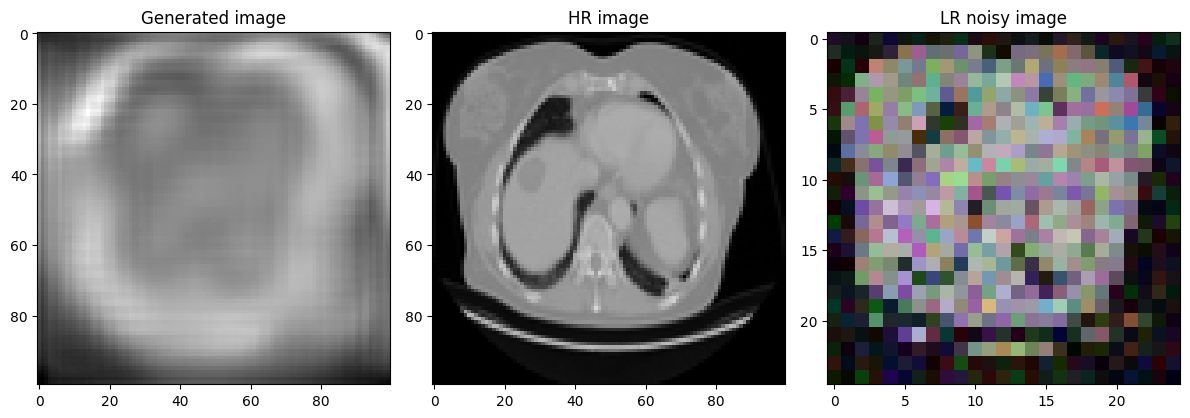

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(12, 4))


gray_image = test_gen[38].mean(axis=2)


normalized_image = gray_image / gray_image.max()
axes[0].set_title("Generated image")
axes[0].imshow(normalized_image, cmap="gray")


axes[1].set_title("HR image")
axes[1].imshow(test_hr[38])


axes[2].set_title("LR noisy image")
axes[2].imshow(test_lr[38])


plt.tight_layout()


plt.show()
